# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [44]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 24047 files belonging to 13 classes.


### Validation Image Preprocessing

In [45]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6011 files belonging to 13 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [46]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\DEWRAJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [49]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [50]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [51]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [52]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [53]:
cnn.add(tf.keras.layers.Flatten())

In [54]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [55]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [56]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=13,activation='softmax'))

### Compiling and Training Phase

In [57]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     2,251,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │        19,513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,056,737 (38.36 MB)

 Trainable params: 10,056,737 (38.36 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
 17/752 ━━━━━━━━━━━━━━━━━━━━ 12:20 1s/step - accuracy: 0.0707 - loss: 2.8049

KeyboardInterrupt: 

## Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

752/752 ━━━━━━━━━━━━━━━━━━━━ 273s 362ms/step - accuracy: 0.9829 - loss: 0.0487
Training accuracy: 0.9839481115341187


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

188/188 ━━━━━━━━━━━━━━━━━━━━ 76s 403ms/step - accuracy: 0.9340 - loss: 0.2230
Validation accuracy: 0.9392780065536499


### Saving Model

In [ ]:
cnn.save('trained_plant_disease_model.keras')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5974134206771851,
  0.8393978476524353,
  0.8943735361099243,
  0.9241485595703125,
  0.9401172995567322,
  0.950846254825592,
  0.9639456272125244,
  0.969975471496582,
  0.9723458290100098,
  0.9744666814804077],
 'loss': [1.1721770763397217,
  0.47132256627082825,
  0.30683276057243347,
  0.22081449627876282,
  0.17273975908756256,
  0.14201954007148743,
  0.10918956995010376,
  0.09020689874887466,
  0.08097416162490845,
  0.07763227075338364],
 'val_accuracy': [0.7882215976715088,
  0.8840458989143372,
  0.9015138745307922,
  0.9311262965202332,
  0.9209781885147095,
  0.9312926530838013,
  0.9259690642356873,
  0.941107988357544,
  0.9421061277389526,
  0.9392780065536499],
 'val_loss': [0.5840474963188171,
  0.3543729782104492,
  0.2908528447151184,
  0.20301921665668488,
  0.24468857049942017,
  0.19485600292682648,
  0.22531092166900635,
  0.18273261189460754,
  0.1772630512714386,
  0.19990794360637665]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

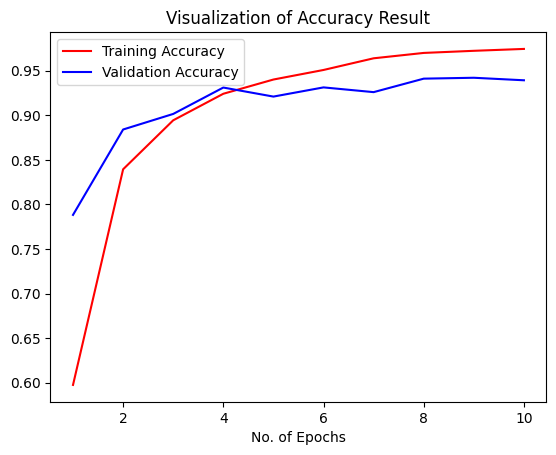

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6011 files belonging to 13 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

6011/6011 ━━━━━━━━━━━━━━━━━━━━ 104s 17ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(6011,), dtype=int64, numpy=array([ 0,  0,  0, ..., 12, 12, 12])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(6011,), dtype=int64, numpy=array([ 0,  0,  0, ..., 12, 12, 12])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                        Potato___Early_blight       0.94      0.99      0.96       485
                         Potato___Late_blight       0.84      0.96      0.90       485
                             Potato___healthy       0.98      1.00      0.99       456
                      Tomato___Bacterial_spot       0.99      0.94      0.97       425
                        Tomato___Early_blight       0.91      0.92      0.92       480
                         Tomato___Late_blight       0.97      0.73      0.84       463
                           Tomato___Leaf_Mold       0.97      0.96      0.96       470
                  Tomato___Septoria_leaf_spot       0.87      0.92      0.89       436
Tomato___Spider_mites Two-spotted_spider_mite       0.95      0.93      0.94       435
                         Tomato___Target_Spot       0.93      0.89      0.91       457
       Tomato___Tomato_Yellow_Leaf_Curl_Vi

### Confusion Matrix Visualization

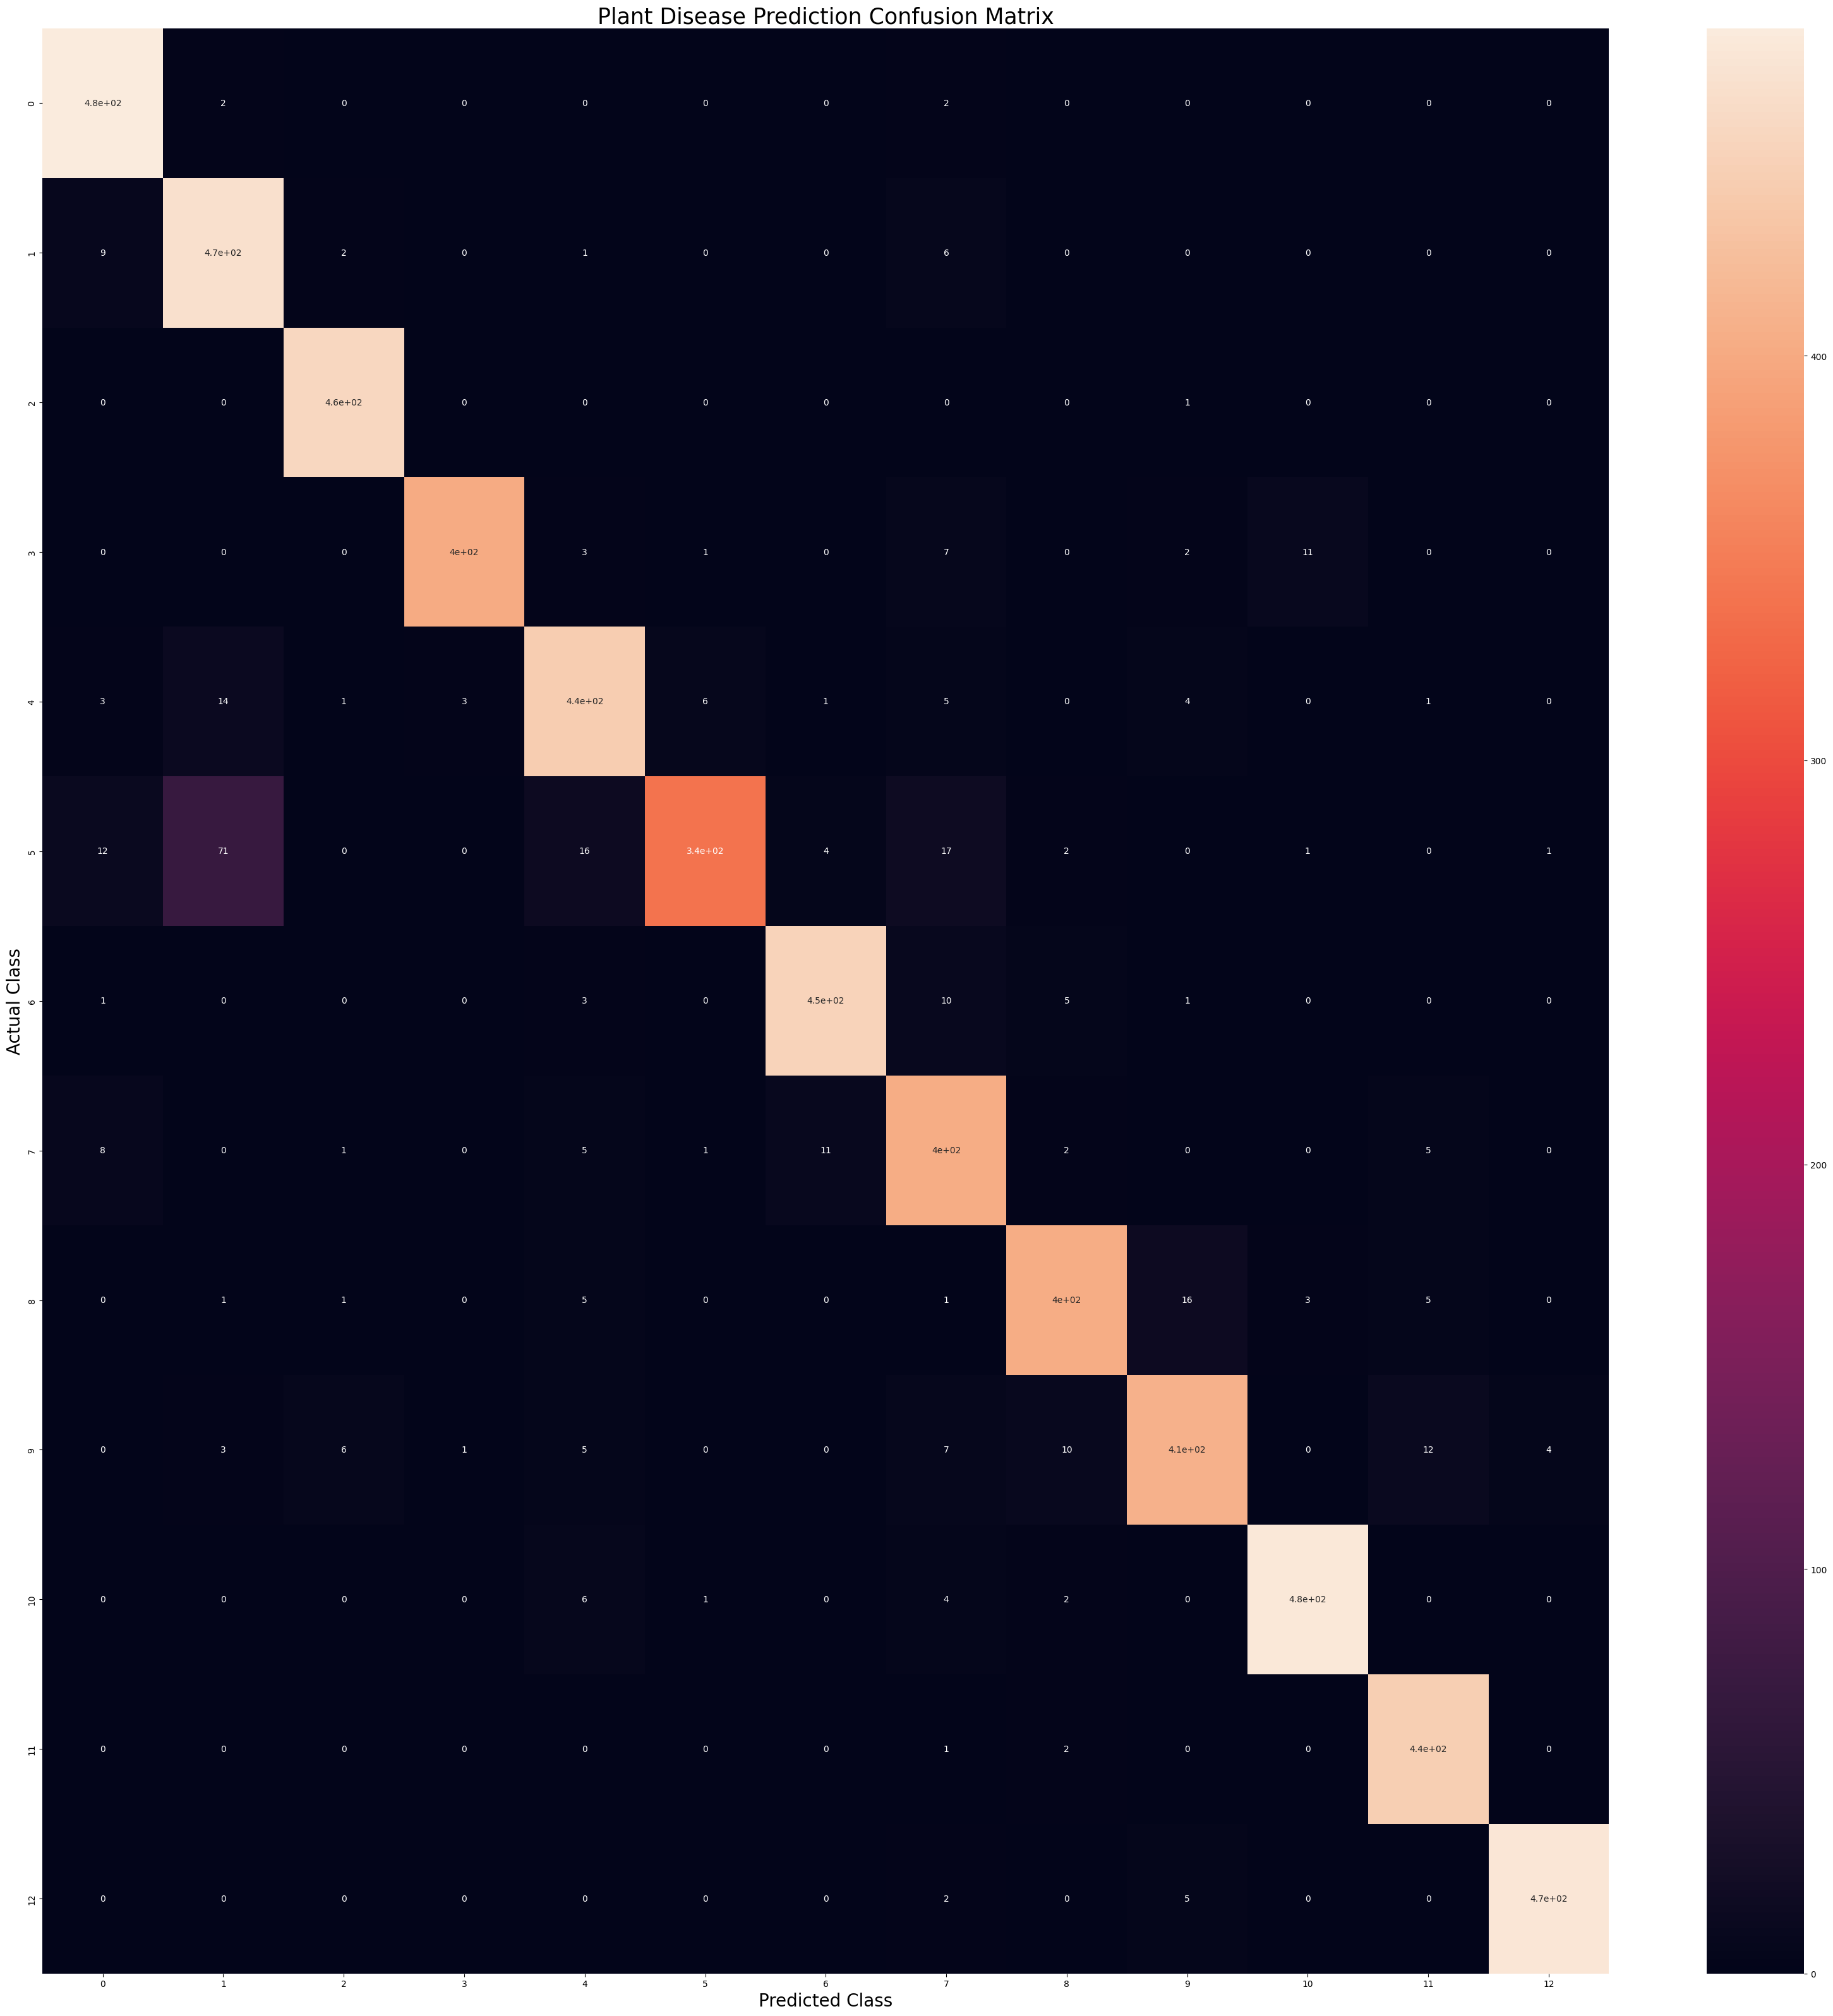

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()